## Datasets

<img align="right" width="300" src="http://www.openradar.io/img/logo.svg.png">

Weather radar datasets hosted on NCI consists of different product levels, namely:

- Level 1: Uncorrected radar data in the native spherical coordinates. Typically used if you want to generate indepth products/analysis.

- Level 2: Derived products in 2D cartesian coodinates using corrected radar data. These products are typically at a set altitude and include rainfall rate, classification , echo top height etc. Data is organised into daily netcdf files for rapid analysis using tools like xarrays. Corrections applied included those for attenuation, clutter removal and reflectivity calibration. 

__For this tutorial we are using two weather radar datasets:__

_CPOL_

- Valentin will be teaching using the CPOL radar dataset, which is hosted on NCI under project hj10. CPOL radar was a polarimetric research weather radar in Darwin that operated from 1997-2017. The extra polarimetric information (which related to precipitation type) this radar provides more robust retrievals of rainfall rate than the Z-R relationship.

- Data from this project can be accessed on NCI and will be published for public access by June 2020 via NCI.

- Level 1 data can be downloaded from the [ARM website](https://www.arm.gov/capabilities/instruments/cpol).

- The code repository used to generate the level 2 dataset from the level 1 archive is avaliable [here](https://github.com/vlouf/cpol_processing). To use this dataset, please contact Valentin.

_Operational Network_

- Joshua will be teaching using the [Australian operation radar dataset](http://openradar.io/), which is hosted on NCI under project rq0. This dataset contains 700+ years of weather radar data from the Australian network of 70+ radars and level 1 data updated daily.

- The level 1 data from this project is published, and level 2 data will be published by June 2020.

- To use the level 1 data, please reference the following [doi](http://dx.doi.org/10.25914/5cb686a8d9450). A majority of radar data in this archive in non-polarimetric.

- The code repository used to generate the level 2 dataset from the level 1 archive is avaliable [here](https://git.nci.org.au/jss548/open-radar). To use the level 2 dataset, please contact Joshua.

---


## Python (3.6+) Tools

Specific Radar Tools (for processing level 1 data)

- [PyART](https://arm-doe.github.io/pyart/): is a Python module containing a collection of weather radar algorithms and utilities. Py-ART is used by the Atmospheric Radiation Measurement (ARM) Climate Research Facility for working with data from a number of its precipitation and cloud radars, but has been designed so that it can be used by others in the radar and atmospheric communities to examine, processes, and analyze data from many types of weather radars.

- [wradlib](https://docs.wradlib.org/en/stable/): The ωradlib project has been initiated in order facilitate the use of weather radar data as well as to provide a common platform for research on new algorithms. ωradlib is designed to assist you in the most important steps of processing weather radar data. These may include: reading common data formats, georeferencing, converting reflectivity to rainfall intensity, identifying and correcting typical error sources (such as clutter or attenuation) and visualising the data.

Data Processing Tools

- [netCDF4](https://unidata.github.io/netcdf4-python/netCDF4/index.html): Python interface to the netCDF version 4 library (.nc files).
- [HDF5](https://www.hdfgroup.org/solutions/hdf5/): a Pythonic interface to the HDF5 binary data format (format used for Australian operational radars).
- [xarray](http://xarray.pydata.org/en/stable/): a package that makes working with labelled multi-dimensional arrays simple, efficient, and fun! allows for a more intuitive, more concise, and less error-prone experience! Builds upon the interfaces that pandas uses.
- [pandas](https://pandas.pydata.org/): like xarray but for tables (smart excel-like tools) 

Editor Tools

- [Jupyter Notebook](https://jupyter.org/): Provides an interactive browser-based environment for developing code
- [Pangeo Binder](https://binder.pangeo.io/): Turns a code repository into a collection of interactive Jupyter Notebooks without needing a Python environment on your local computer (used Google Compute Engine)

_How cool is that?_

<img align="left" width="300" src="https://pangeo-binder.readthedocs.io/en/prod/_images/binder_logo.png">

## Demonstration - Accessing Level 1 data from the operational network

(you don't need acccess to NCI for this data!)

In [20]:
import os #used for system commands
import tempfile #used to create temporary folders to store data
import zipfile #used to extract tar files
import urllib #used to download data via http
from glob import glob #used for manipulating pathnames

from matplotlib import pyplot as plt #plotting toolkit
import pyart #python radar toolkit

"""
Options to define our data selection and plotting
"""

#Specific the radar and date we want to download
radar_id     = '15' #this is the Marburg radar near Brisbane. if using a single digit, include a leading 0, e.g., '02'. Complete list of radar id's is on openradar.io
date_str     = '20200208' #in yyyymmdd
base_url     = 'http://dapds00.nci.org.au/thredds/fileServer/rq0' #base url for NCI server

#specify radar tilt and field to plot
tilt      = 2 #third tilt (python starts from 0)!
field     = 'DBZH' #reflectivity

In [21]:
"""
here we build the server request url, download data and unzip
"""

#step 1: build request url and download zip file
zip_fn       = radar_id + '_' + date_str + '.pvol.zip'
request_url  = '/'.join([base_url, 'odim_pvol', radar_id, date_str[0:4], 'vol', zip_fn])
print('my request is ',request_url)
#download the zip file
urllib.request.urlretrieve(request_url, zip_fn)

#step 2: extract the zip file to a temporary directory
temp_dir = tempfile.mkdtemp()
zip_fh = zipfile.ZipFile(zip_fn)
zip_fh.extractall(path = temp_dir)
zip_fh.close()

#step 3: list all the volumes extracted from the zip file
file_list = sorted(glob(temp_dir + '/*'))
#print out file list with index
for item in file_list:
    print(file_list.index(item),item)
#remove zip
os.system('rm ' + zip_fn)

my request is  http://dapds00.nci.org.au/thredds/fileServer/rq0/odim_pvol/15/2020/vol/15_20200208.pvol.zip
0 /tmp/tmpmz6c1511/15_20200208_000111.pvol.h5
1 /tmp/tmpmz6c1511/15_20200208_001111.pvol.h5
2 /tmp/tmpmz6c1511/15_20200208_002111.pvol.h5
3 /tmp/tmpmz6c1511/15_20200208_003111.pvol.h5
4 /tmp/tmpmz6c1511/15_20200208_004111.pvol.h5
5 /tmp/tmpmz6c1511/15_20200208_005111.pvol.h5
6 /tmp/tmpmz6c1511/15_20200208_010110.pvol.h5
7 /tmp/tmpmz6c1511/15_20200208_011112.pvol.h5
8 /tmp/tmpmz6c1511/15_20200208_012111.pvol.h5
9 /tmp/tmpmz6c1511/15_20200208_013111.pvol.h5
10 /tmp/tmpmz6c1511/15_20200208_014111.pvol.h5
11 /tmp/tmpmz6c1511/15_20200208_015112.pvol.h5
12 /tmp/tmpmz6c1511/15_20200208_021111.pvol.h5
13 /tmp/tmpmz6c1511/15_20200208_022112.pvol.h5
14 /tmp/tmpmz6c1511/15_20200208_023111.pvol.h5
15 /tmp/tmpmz6c1511/15_20200208_024112.pvol.h5
16 /tmp/tmpmz6c1511/15_20200208_025111.pvol.h5
17 /tmp/tmpmz6c1511/15_20200208_030111.pvol.h5
18 /tmp/tmpmz6c1511/15_20200208_032112.pvol.h5
19 /tmp/tm

0

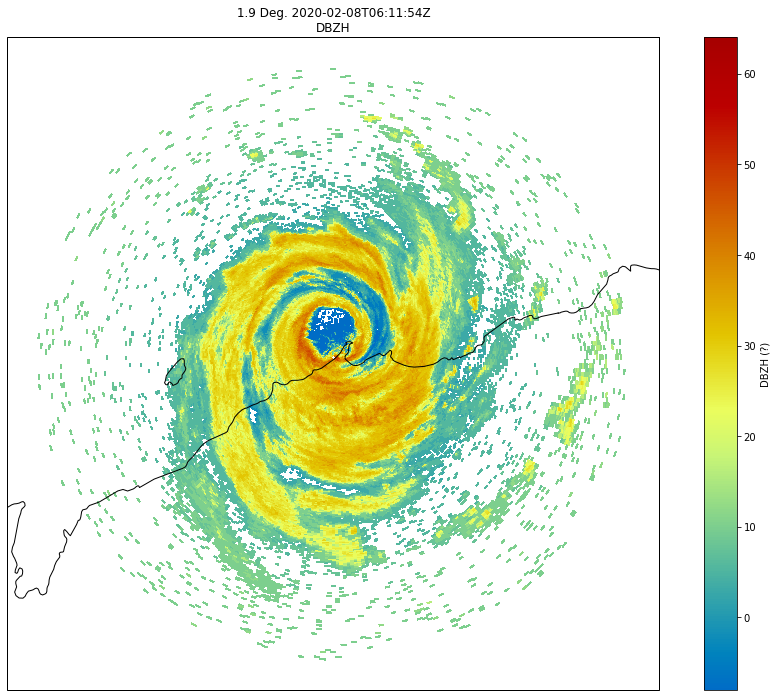

In [22]:
"""
select a file from the list and plot
"""

#select index from file list
my_index = 29
#read in radar object using pyart
radar = pyart.aux_io.read_odim_h5(file_list[my_index], file_field_names=True)
#generate display object
display = pyart.graph.RadarMapDisplay(radar)
#plot reflectivity field from a single tilt (this function includes a basemap)
fig = plt.figure(figsize=(16, 12), facecolor='w')
display.plot_ppi_map('DBZH', tilt,
                            vmin=-8, vmax=64, cmap=pyart.graph.cm_colorblind.HomeyerRainbow,
                            resolution='10m')

# Non-meteorological returns (clutter)

The follow section introduces non-meteorological returns with weather radar (like an observations).
It is important to be aware of these issues when processing long time-series of data.

For some scientists these returns provide a unique dataset! e.g., [Meade et al. 2019](https://www.nature.com/articles/s41598-019-46549-2)

### Sources

Any object within the path of the EM wave will results in scattering. The magnitude and stability of the scattering relates to the target's size and movements. Non-meteorological targets are a hindrance for climate studies, but have many uses otherwise, including radar calibration and ecological monitoring.


- Ground
- Buildings
- Ships
- Aircraft
- Power lines
- Birds/bats
- Insects
- Suspended ash from bushfires
- Unidentified Objects!?


<img align="center" width="800" src="img/IDR71_20191221.gif">

<img align="center" width="800" src="img/IDR63_20191225.gif">

### Removing clutter

Reflectivity (DBZH) products in the level 2 open radar archive have been processed to remove most ground clutter (some can still sneak through). It is still difficult to remove smaller, non-stationary targets from single polarimetric data. Fortunately most clutter are stationary and can be removed by looking at the persistence of high reflectivity or using zero Doppler velocity.

The new Rainbow, VIC weather radar (80km NW of Horsham)

<img align="left" width="800" height="800" src="img/IDR95_satellite.png" border="5">


<img align="left" width="800" height="800" src="img/IDR95_TH.png" border="5">

<img align="left" width="800" height="800" src="img/IDR95_DBZH.png" border="5">